In [3]:
## Carga de Librearias usadas en el análisis descriptivo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv(r'docs\data\Turistas_v_ctimas_de_delitos_en_Colombia.csv')

In [5]:
df.head()

,FECHA,PAÍS,DEPARTAMENTO,MUNICIPIO,DELITO,PAIS VÍCTIMA,GENERO,ZONA,CIRCUNSTANCIASPERSONA
0,2022-01-01T00:00:00.000,COLOMBIA,MAGDALENA,Santa Marta (CT),ARTÍCULO 239. HURTO PERSONAS,COLOMBIA,FEMENINO,URBANA,COLOMBIA
1,2022-01-01T00:00:00.000,COLOMBIA,MAGDALENA,Santa Marta (CT),ARTÍCULO 239. HURTO PERSONAS,COLOMBIA,MASCULINO,URBANA,COLOMBIA
2,2022-01-01T00:00:00.000,COLOMBIA,MAGDALENA,Santa Marta (CT),ARTÍCULO 239. HURTO PERSONAS,COLOMBIA,MASCULINO,URBANA,COLOMBIA
3,2022-01-02T00:00:00.000,COLOMBIA,ANTIOQUIA,Medellín (CT),ARTÍCULO 239. HURTO PERSONAS,CHINA,MASCULINO,URBANA,CHINA
4,2022-01-03T00:00:00.000,COLOMBIA,MAGDALENA,Santa Marta (CT),ARTÍCULO 239. HURTO PERSONAS,COLOMBIA,MASCULINO,URBANA,COLOMBIA


In [6]:
df[['Fecha', 'Extra']] = df['FECHA'].str.split('T', expand=True)
df[['Extra_1', 'Delito']] = df['DELITO'].str.split('.', expand=True)

In [7]:
df = df.drop(columns=["Extra", "Extra_1", "FECHA", "DELITO"])

In [8]:
df.rename(columns={'Fecha': 'FECHA', "Delito": "DELITO"}, inplace=True)

In [9]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
# Mantener solo la parte de fecha (sin hora)
df['FECHA'] = df['FECHA'].dt.date

In [10]:
df.describe()

,PAÍS,DEPARTAMENTO,MUNICIPIO,PAIS VÍCTIMA,GENERO,ZONA,CIRCUNSTANCIASPERSONA,FECHA,DELITO
count,491,491,491,491,491,491,491,491,445
unique,1,19,36,38,2,2,38,245,16
top,COLOMBIA,MAGDALENA,Santa Marta (CT),COLOMBIA,MASCULINO,URBANA,COLOMBIA,2022-04-14,HURTO PERSONAS
freq,491,272,260,230,312,445,230,7,414


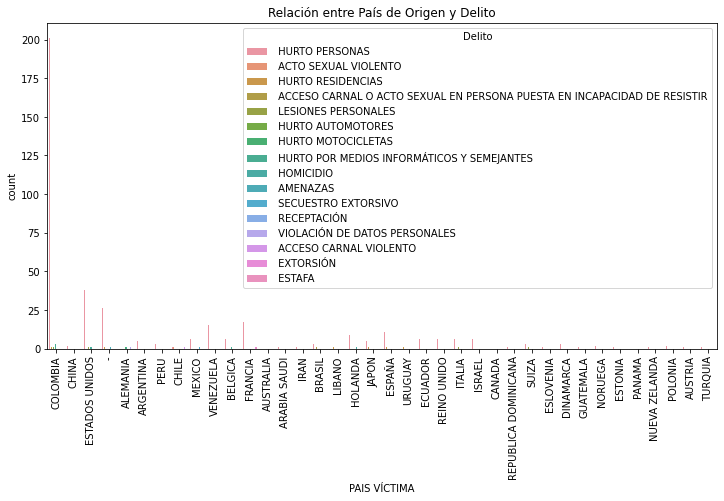

In [11]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.countplot(x='PAIS VÍCTIMA', hue='DELITO', data=df)
plt.xticks(rotation=90)
plt.title('Relación entre País de Origen y Delito')
plt.legend(title='Delito', loc='upper right')
plt.show()

In [84]:
# Agrupar y contar los delitos por país
conteo_paises_delitos = df.groupby(['PAIS VÍCTIMA', 'DELITO']).size().reset_index(name='Conteo')

# Crear una gráfica interactiva de barras
fig = px.bar(conteo_paises_delitos, x='PAIS VÍCTIMA', y='Conteo', color='DELITO', title='Conteo de Delitos por País de Origen')

# Configurar el diseño de la gráfica
fig.update_layout(
    xaxis_title='País de Origen',
    yaxis_title='Conteo de Delitos',
    showlegend=True
)

# Mostrar la gráfica interactiva
fig.show()

In [35]:
# Crear una gráfica interactiva de barras con todos los países por defecto
fig = px.bar(conteo_paises_delitos, x='DELITO', y='Conteo', color='PAIS VÍCTIMA', title='Conteo de Delitos por País de Origen')

# Obtener la lista de países víctimas para el dropdown
paises_victimas = ['Todos los Países'] + list(conteo_paises_delitos['PAIS VÍCTIMA'].unique())

# Inicializar la aplicación de Dash
app = dash.Dash(__name__)

# Definir el diseño de la aplicación
app.layout = html.Div([
    html.H4('Conteo de Delitos por País de Origen'),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': pais, 'value': pais} for pais in paises_victimas],
        value='Todos los Países',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

# Definir el callback para actualizar la gráfica de barras
@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(pais_seleccionado):
    if pais_seleccionado == 'Todos los Países':
        datos_filtrados = conteo_paises_delitos
    else:
        datos_filtrados = conteo_paises_delitos[conteo_paises_delitos['PAIS VÍCTIMA'] == pais_seleccionado]
    fig = px.bar(datos_filtrados, x="DELITO", y="Conteo", color="PAIS VÍCTIMA", title=f'Conteo de Delitos por País de Origen')
    fig.update_layout(
        xaxis_title='Delito',
        yaxis_title='Conteo de Delitos',
        showlegend=True,
        legend_title_text='País de Origen'
    )
    return fig

# Iniciar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)